In [1]:
import pandas as pd
import numpy as np
import spacy
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import re
from wordcloud import WordCloud
import itertools
import collections
import nltk
import string
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import gensim
import multiprocessing
from gensim.models import Word2Vec
from multiprocessing import Process
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
import sklearn
from sklearn.cluster import KMeans

In [2]:
data18 = pd.read_csv('carbondata_labeled_custom22.csv')
#data18 = pd.read_csv('carbondata_21_221031.csv')

C:\Users\dantr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data22 = pd.read_csv('carbondata_labeled_custom22.csv')
data21 = pd.read_csv('carbondata_labeled_custom21.csv')

C:\Users\dantr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
data21_withSA = pd.read_csv('data21_3algos.csv')

C:\Users\dantr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data22_withSA = pd.read_csv('data22_3algos.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data22_3algos.csv'

In [5]:
data22_withSA.head()

NameError: name 'data22_withSA' is not defined

In [4]:
df18_location = data18.loc[data18['Place'].notnull()]
df18_location

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place
40,harmsy,False,2009-02-14 21:09:43+00:00,993,633,0,en,2022-10-31 22:07:08+00:00,0,Twitter for iPad,1587204551194583043,@cathynewman @SuellaBraverman @UKLabour 😂 You ...,['NetZero'],1587203174871490561,https://twitter.com/cathynewman,"Coordinates(longitude=0.0873022, latitude=52.1...","Place(fullName='Cambridge, England', name='Cam..."
426,DioManchester,False,2011-09-01 15:17:15+00:00,4366,1086,0,en,2022-10-31 12:37:33+00:00,0,Twitter Web App,1587061209379004416,Adding to the series of webinars designed by t...,['NetZero'],1587061209379004416,NaN,"Coordinates(longitude=-2.319934, latitude=53.3...","Place(fullName='Manchester, England', name='Ma..."
472,FengwangLi,False,2012-06-21 01:17:30+00:00,1226,1504,3,en,2022-10-31 12:05:23+00:00,44,Twitter for iPhone,1587053116523888640,"Representing @Eng_IT_Sydney &amp; NZI, I had a...","['STEMM', 'NetZero', 'CleanEnergy', 'SolarFuel...",1587053116523888640,NaN,"Coordinates(longitude=150.520928608, latitude=...","Place(fullName='Sydney, New South Wales', name..."
499,dazbrady,False,2009-02-13 11:52:38+00:00,2823,4029,1,en,2022-10-31 11:31:33+00:00,1,Twitter for Android,1587044600774017024,"Yet again ""going Green"" has been nothing but a...","['NetZero', 'ClimateScam']",1587044600774017024,NaN,"Coordinates(longitude=-0.7930847, latitude=51....","Place(fullName='Bracknell, England', name='Bra..."
793,andyheald,False,2011-03-13 08:41:09+00:00,13400,7543,7,en,2022-10-31 07:07:58+00:00,25,Twitter for iPhone,1586978267298512896,Edinburgh has a clear commitment to being both...,"['MillionTreeCity', 'NetZero']",1586978267298512896,NaN,"Coordinates(longitude=-3.3285119, latitude=55....","Place(fullName='Edinburgh, Scotland', name='Ed..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354702,AlecTang_,False,2012-07-10 21:28:23+00:00,4073,1915,2,en,2021-01-05 07:43:57+00:00,5,Twitter for iPhone,1346361782571556864,my (completely unbiased 😬) prediction is Aotea...,"['netzero', '1o5C', 'transport', 'heat', 'buil...",1346361782571556864,NaN,"Coordinates(longitude=175.805921, latitude=-38...",Place(fullName='Western Bay of Plenty District...
354790,NoelClehane,False,2015-10-09 08:05:24+00:00,2799,4794,2,en,2021-01-04 17:53:00+00:00,4,Twitter for iPhone,1346152667068960772,1st webinar of 2021 was a thought-provoking on...,"['TopRisks2021', 'NetZero', 'GZero', 'Covid', ...",1346152667068960772,NaN,"Coordinates(longitude=4.4703525, latitude=50.8...","Place(fullName='Wezembeek-Oppem, België', name..."
354848,VickiDutton1,False,2012-09-07 03:28:39+00:00,2306,5004,2,en,2021-01-04 14:03:19+00:00,2,Twitter for Android,1346094865705144322,https://t.co/S3BzeTfSEV\n\nAfter decades of #s...,"['soil', 'conservation', 'WesternCanada', 'soi...",1346094865705144322,NaN,"Coordinates(longitude=-109.223674, latitude=52...","Place(fullName='Paynton No. 470, Saskatchewan'..."
354917,nashtowers,False,2014-03-03 23:24:38+00:00,140,554,0,qht,2021-01-04 10:57:59+00:00,1,Twitter for iPhone,1346048223316738048,#energyindustry #utilities #energynews #energy...,"['energyindustry', 'utilities', 'energynews', ...",1346048223316738048,NaN,"Coordinates(longitude=-0.245869, latitude=51.3...","Place(fullName='Sutton, London', name='Sutton'..."


In [20]:
df18_location[df18_location['Place'].str.contains('GB')]['Place']

40        Place(fullName='Cambridge, England', name='Cam...
426       Place(fullName='Manchester, England', name='Ma...
499       Place(fullName='Bracknell, England', name='Bra...
793       Place(fullName='Edinburgh, Scotland', name='Ed...
1001      Place(fullName='Swansea, Wales', name='Swansea...
                                ...                        
354362    Place(fullName='Sutton, London', name='Sutton'...
354594    Place(fullName='Garston, England', name='Garst...
354687    Place(fullName='Sutton, London', name='Sutton'...
354917    Place(fullName='Sutton, London', name='Sutton'...
355008    Place(fullName='Oakington, England', name='Oak...
Name: Place, Length: 3149, dtype: object

In [21]:
((1661+3149)/6739)*100

71.37557501112924

In [13]:
df18_location.Place.value_counts()

Place(fullName='Manhattan, NY', name='Manhattan', type='city', country='United States', countryCode='US')                         846
Place(fullName='Dallas, TX', name='Dallas', type='city', country='United States', countryCode='US')                               156
Place(fullName='Glasgow, Scotland', name='Glasgow', type='city', country='United Kingdom', countryCode='GB')                      152
Place(fullName='Sevenoaks Weald, South East', name='Sevenoaks Weald', type='city', country='United Kingdom', countryCode='GB')    132
Place(fullName='New Haven, CT', name='New Haven', type='city', country='United States', countryCode='US')                         115
                                                                                                                                 ... 
Place(fullName='Greeley, CO', name='Greeley', type='city', country='United States', countryCode='US')                               1
Place(fullName='Serendah, Selangor', name='Serendah', type='ci

In [27]:
data22

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,...,Coordinates,Place,TweetC,clean_tweet,cleaned_tweet,date,month,year,sentiment,sentiments_val
0,CarbonCredits,False,2017-06-21 17:44:31+00:00,6799,283,0,en,2022-10-31 23:36:00+00:00,5,Twitter Web App,...,NaN,NaN,Nigeria is pioneering a billion-dollar worth o...,"['nigeria', 'pioneer', 'billion', 'dollar', 'w...",nigeria pioneer billion dollar worth voluntary...,2022-10-31 23:36:00+00:00,10,2022,1,positive
1,M_Costelloe,False,2012-05-03 02:19:44+00:00,604,819,0,en,2022-10-31 23:29:50+00:00,3,Twitter for iPhone,...,NaN,NaN,@anuearthscience @cosmicpinot Rare Earth Confe...,"['rare', 'earth', 'conference']",rare earth conference,2022-10-31 23:29:50+00:00,10,2022,1,positive
2,PatriotHydrogen,False,2022-08-15 11:29:38+00:00,7,1,2,en,2022-10-31 23:13:50+00:00,1,Twitter Web App,...,NaN,NaN,Patriot Hydrogen has launched in Malaysia with...,"['patriot', 'hydrogen', 'launch', 'malaysia', ...",patriot hydrogen launch malaysia first many pr...,2022-10-31 23:13:50+00:00,10,2022,1,positive
3,SGPPartnership,False,2012-09-05 15:14:54+00:00,1060,897,1,en,2022-10-31 23:05:05+00:00,1,Semrush Social Media Tool,...,NaN,NaN,SGP Patrons help shape a more #sustainablefutu...,"['sgp', 'patron', 'help', 'shape', 'print', 'i...",sgp patron help shape print industry,2022-10-31 23:05:05+00:00,10,2022,0,neutral
4,PeriCarbon,False,2022-08-16 23:58:10+00:00,3,18,0,en,2022-10-31 23:02:17+00:00,2,Twitter Web App,...,NaN,NaN,Measuring #carbon emissions is the first step ...,"['measure', 'emission', 'first', 'step', 'addr...",measure emission first step address impact acc...,2022-10-31 23:02:17+00:00,10,2022,1,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99794,RealJohnWynne,False,2010-11-26 16:57:20+00:00,1086,1428,0,en,2022-01-01 00:43:01+00:00,1,Twitter for iPad,...,NaN,NaN,Massively improved public transport connectivi...,"['massively', 'improve', 'public', 'transport'...",massively improve public transport connectivit...,2022-01-01 00:43:01+00:00,1,2022,1,positive
99795,equitableenergy,False,2014-08-30 17:02:31+00:00,448,2616,1,en,2022-01-01 00:38:18+00:00,3,Twitter Web App,...,NaN,NaN,Thank you @RockefellerFdn @EnergyAlliance! End...,"['thank', 'end', 'heart', 'achieve', 'sustaina...",thank end heart achieve sustainable amp equita...,2022-01-01 00:38:18+00:00,1,2022,1,positive
99796,stratandbiz,False,2011-08-31 14:52:45+00:00,154372,4000,1,en,2022-01-01 00:30:06+00:00,3,Salesforce - Social Studio,...,NaN,NaN,How #NetZero goals set from afar may impact Af...,"['goal', 'set', 'afar', 'may', 'impact', 'afri...",goal set afar may impact africa future develop...,2022-01-01 00:30:06+00:00,1,2022,0,neutral
99797,Cmh176Hughes,False,2013-01-10 01:09:09+00:00,281,728,1,en,2022-01-01 00:21:35+00:00,1,Twitter Web App,...,NaN,NaN,Shockwave from huge #explosion in five-story #...,"['shockwave', 'huge', 'five', 'story', 'silo',...",shockwave huge five story silo rock hazmat spe...,2022-01-01 00:21:35+00:00,1,2022,1,positive


In [28]:
data22.sentiments_val.value_counts()

positive    74721
neutral     14971
negative    10037
Name: sentiments_val, dtype: int64

In [26]:
(27292/125298)*100

21.78167249277722

In [ ]:
data22.sentiments_val.value_counts()

In [31]:
(74721/99799)*100

74.8714916983136

In [32]:
data21.groupby('month').sentiments_val.value_counts()

month  sentiments_val
1      negative           6064
2      negative           7007
3      negative           9868
4      negative           9614
5      negative           9661
6      negative           9874
7      negative           9064
8      negative           7889
9      negative          10401
10     negative          11419
       positive           5036
       neutral             869
11     positive          15786
       neutral            3425
       negative           1156
12     positive           6470
       neutral            1147
       negative            523
Name: sentiments_val, dtype: int64

### Pre-processsing

In [24]:
data18['Tweet'].iloc[3]

'Because your children deserve a ‘better’ world..\n\n#skypapers #cop27 #netzero #ClimateEmergency #ClimateScam #climatesame https://t.co/X4Q5EBtb74'

In [25]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
  
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [26]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dantr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
# the function to clean the tweet and tokenize them
def clean_tweet(tweet):
    if type(tweet) == float:
            return ""

    # turn text into lower
    test = tweet.lower()
    # remove all mentions and hashtags 
    test = re.sub("@[A-Za-z0-9_]+","", test)
    test = re.sub("#[A-Za-z0-9_]+","", test)
    #remove links
    test = re.sub(r"http\S+", "", test)
    test = re.sub(r"www.\S+", "", test)
    #remove punctuation
    test = re.sub('[()!?]', ' ', test)
    test = re.sub('\[.*?\]',' ', test)
    #remove non alphabetical characters
    test = re.sub("[^a-z0-9]"," ", test)
    #remove extra spaces
    test = re.sub(' +', ' ', test)
    
    #remove many abbreviations
    test = re.sub(r"there's", "there is", test)
    test = re.sub(r"i'm", "i am", test)
    test = re.sub(r"he's", "he is", test)
    test = re.sub(r"she's", "she is", test)
    test = re.sub(r"it's", "it is", test)
    test = re.sub(r"that's", "that is", test)
    test = re.sub(r"what's", "that is", test)
    test = re.sub(r"where's", "where is", test)
    test = re.sub(r"how's", "how is", test)
    test = re.sub(r"\'ll", " will", test)
    test = re.sub(r"\'ve", " have", test)
    test = re.sub(r"\'re", " are", test)
    test = re.sub(r"\'d", " would", test)
    test = re.sub(r"\'re", " are", test)
    test = re.sub(r"won't", "will not", test)
    test = re.sub(r"can't", "cannot", test)
    test = re.sub(r"n't", " not", test)
    test = re.sub(r"n'", "ng", test)
    test = re.sub(r"'bout", "about", test)
    test = re.sub(r"'til", "until", test)
    test = re.sub(r"\"", "", test)
    test = re.sub(r"\'", "", test)
    test = re.sub(r' s ', "", test)
    test = re.sub(r"[\[\]\\0-9()\"$#%/@;:<>{}`+=~|.!?,-]", "", test)
    test = re.sub(r"&", "", test)
    test = re.sub(r"\\n", "", test)
    
    # remove single letter words
    test = ' '.join( [w for w in test.split() if len(w)>1] )
    
    test = ' '.join( [lemma.lemmatize(x) for x in nltk.wordpunct_tokenize(test) if x not in stop_words])
    test =[lemma.lemmatize(x, nltk.corpus.reader.wordnet.VERB) for x in nltk.wordpunct_tokenize(test) if x not in stop_words]

    return test

In [28]:
clean_tweet(data18['Tweet'].iloc[4])

['omg', 'nztwork', 'launch', 'hardware', 'presale', 'soon', 'go', 'epic']

In [29]:
# clean the tweets and create two columns: tokenized tweet and whole tweet
data18["clean_tweet"]=data18["Tweet"].apply(lambda x:clean_tweet(x))
data18["cleaned_tweet"]=data18["clean_tweet"].apply(lambda x:' '.join(x))

In [30]:
data18['clean_tweet'].iloc[4]

['omg', 'nztwork', 'launch', 'hardware', 'presale', 'soon', 'go', 'epic']

In [13]:
data18['cleaned_tweet'].iloc[4]

'omg nztwork launch hardware presale soon go epic'

In [14]:
data18.shape

(355229, 19)

In [15]:
tweets = data18['clean_tweet']
tweets[:10]

0    [nigeria, pioneer, billion, dollar, worth, vol...
1    [green, builder, medium, join, force, house, s...
2                            [rare, earth, conference]
3                      [child, deserve, better, world]
4    [omg, nztwork, launch, hardware, presale, soon...
5    [omg, nztwork, launch, hardware, presale, soon...
6    [web3, startup, launch, eco, positive, nft, pr...
7    [carbon, confusion, shine, clermont, conferenc...
8    [nwt, carbon, price, approach, change, align, ...
9                                                   []
Name: clean_tweet, dtype: object

### Hashtags

In [16]:
# define a function to clean the Hashtags.
def clean_hashtags(hashtags):
    '''
    hashtags: String
              Input Data
    hashtags: String
              Output Data
           
    func: Convert hashtags to lower case
          Replace ticker symbols with space. The ticker symbols are any stock symbol that starts with $.
          Replace everything not a letter or apostrophe with space
          Removes any spaces or specified characters at the start and end of hashtags.
          
    '''
    if hashtags:
        hashtags = hashtags.lower()
        hashtags = re.sub('\$[a-zA-Z0-9]*', ' ', hashtags)
        hashtags = re.sub('[^a-zA-Z]', ' ', hashtags)
        hashtags=hashtags.strip() 
    return hashtags

In [17]:
# clean the hashtags
data18["Hashtags"]=data18["Hashtags"].astype(str)
data18["Hashtags"]=data18["Hashtags"].apply(lambda x:clean_hashtags(x))

In [18]:
data18.head()

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place,clean_tweet,cleaned_tweet
0,CarbonCredits,False,2017-06-21 17:44:31+00:00,6799,283,0,en,2022-10-31 23:36:00+00:00,5,Twitter Web App,1587226914174935043,Nigeria is pioneering a billion-dollar worth o...,carboncredits carbonoffsets netzero a...,1587226914174935043,NaN,NaN,NaN,"[nigeria, pioneer, billion, dollar, worth, vol...",nigeria pioneer billion dollar worth voluntary...
1,greenbuildermag,False,2010-03-08 17:02:15+00:00,9626,5456,0,en,2022-10-31 23:35:21+00:00,0,Metricool,1587226750240571393,Green Builder Media has joined forces with hou...,thesondersproject netzero greenbuildermedia,1587226750240571393,NaN,NaN,NaN,"[green, builder, medium, join, force, house, s...",green builder medium join force house sector p...
2,M_Costelloe,False,2012-05-03 02:19:44+00:00,604,819,0,en,2022-10-31 23:29:50+00:00,3,Twitter for iPhone,1587225362102386688,@anuearthscience @cosmicpinot Rare Earth Confe...,criticalminerals netzero,1587225362102386688,NaN,NaN,NaN,"[rare, earth, conference]",rare earth conference
3,PauIRob,False,2014-02-02 11:58:19+00:00,297,97,1,en,2022-10-31 23:27:46+00:00,0,Twitter for iPad,1587224841773531137,Because your children deserve a ‘better’ world...,skypapers cop netzero climateemerge...,1587224841773531137,NaN,NaN,NaN,"[child, deserve, better, world]",child deserve better world
4,Bahtiar041221,False,2022-01-27 00:18:11+00:00,156,1499,0,en,2022-10-31 23:26:58+00:00,0,Twitter Web App,1587224643131256832,OMG! NZTwork is launching their HARDWARE PRESA...,netzerotoken nztwork carboncredits co...,1587224643131256832,NaN,NaN,NaN,"[omg, nztwork, launch, hardware, presale, soon...",omg nztwork launch hardware presale soon go epic


### DateColumns: + month, year columns

In [19]:
data18['date'] = pd.to_datetime(data18['Date_Tweet'], format='%Y-%m-%d')
data18['month'] = data18['date'].dt.month
data18['year'] = data18['date'].dt.year

In [20]:
data18.tail()

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,...,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place,clean_tweet,cleaned_tweet,date,month,year
355224,SusHealthcare,False,2011-07-05 09:29:14+00:00,7488,4420,4,en,2021-01-01 01:00:22+00:00,5,Hootsuite Inc.,...,netzero greenspaceforhealth climateaction,1344810662971715586,NaN,NaN,NaN,"[2020, year, book, amidst, pandemic, saw, dema...",2020 year book amidst pandemic saw demand envi...,2021-01-01 01:00:22+00:00,1,2021
355225,LisaKayeCAP,False,2013-08-02 04:16:44+00:00,376,832,1,en,2021-01-01 01:00:03+00:00,1,LinkedIn,...,netzero,1344810585658175491,NaN,NaN,NaN,"[race, accelerate, mettler, andrillon, podcast...",race accelerate mettler andrillon podcast disc...,2021-01-01 01:00:03+00:00,1,2021
355226,thegalonthego,False,2016-04-12 23:51:26+00:00,398,1346,0,en,2021-01-01 00:32:59+00:00,1,Twitter Web App,...,netzero emissions,1344803774854881280,NaN,NaN,NaN,"[excellent, reminder]",excellent reminder,2021-01-01 00:32:59+00:00,1,2021
355227,raularteche,False,2011-11-12 12:30:32+00:00,37,91,2,es,2021-01-01 00:11:37+00:00,3,Smarp.,...,redlovesgreen netzero ceroemisionesnetas...,1344798397019152384,NaN,NaN,NaN,"[anunciamos, la, renovaci, de, nuestra, flota,...",anunciamos la renovaci de nuestra flota con ve...,2021-01-01 00:11:37+00:00,1,2021
355228,raularteche,False,2011-11-12 12:30:32+00:00,37,91,2,es,2021-01-01 00:11:17+00:00,3,Smarp.,...,planeta sostenibilidad netzero ceroem...,1344798313854414849,NaN,NaN,NaN,"[en, vodafone, hemos, dado, un, paso, comprome...",en vodafone hemos dado un paso comprometimos a...,2021-01-01 00:11:17+00:00,1,2021


In [21]:
list(data18['cleaned_tweet'][(data18['year']==2022)&(data18['month']==9)][:10])

['alan ahn say still fuel future wire green speaker explain smaller efficient bedrock 24',
 'look forward attend fall festival amp connect jayman team hill charlesworth kudos jayman continue effort lead progress educate consumer',
 'safety waste storage promise tech fact change since last make mind safe reliable 24 power',
 'new climate news scale renewables mean big change electricity network',
 'emission daylight robbery double tell u 100 renewables unacceptable',
 'treat co2 pollutant basis life earth fee plant control switch global temperature ditch immediately climate crisis imaginary crisis manufacture totalitarian leave',
 'power receive highest support record week iaea conference global shift towards increasingly favourable attitude nuclear power come 50 member state plus 27 nation',
 'finance refi process use various form capital drive systematic sustainable positive change stakeholder',
 'bite gobsmacked energy expert queensland announcement break coal',
 'expose sell false a

## Kmeans algorithm

### Turn tweets into embedding vectors 

In [ ]:
#Converting the "clean_tweet" column in the format supported by embeddings.
sent = [row for row in data18["clean_tweet"]]

#use Gensim Phrases package to automatically detect common phrases (bigrams) from a list of sentences.
phrases = Phrases(sent, min_count=1, progress_per=50000)
bigram = gensim.models.phrases.Phraser(phrases)
sentences = bigram[sent]
sentences[1]

# https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial 

In [31]:
sent = [row for row in data18["clean_tweet"]]
sent

[['nigeria',
  'pioneer',
  'billion',
  'dollar',
  'worth',
  'voluntary',
  'carbon',
  'market',
  'africa',
  'africa',
  'carbon',
  'market',
  'initiative',
  'acmi',
  'estimate',
  'nigeria',
  'create',
  'million',
  'carbon',
  'credit',
  'per',
  'year'],
 ['green',
  'builder',
  'medium',
  'join',
  'force',
  'house',
  'sector',
  'pioneer',
  'thrive',
  'home',
  'builder',
  'launch',
  'home',
  'community',
  'locate',
  'fort',
  'collins',
  'colorado',
  'push',
  'limit',
  'carbon',
  'development'],
 ['rare', 'earth', 'conference'],
 ['child', 'deserve', 'better', 'world'],
 ['omg', 'nztwork', 'launch', 'hardware', 'presale', 'soon', 'go', 'epic'],
 ['omg', 'nztwork', 'launch', 'hardware', 'presale', 'soon', 'go', 'epic'],
 ['web', 'startup', 'launch', 'eco', 'positive', 'nft', 'projec'],
 ['carbon', 'confusion', 'shine', 'clermont', 'conference', 'beef', 'central'],
 ['nwt',
  'carbon',
  'price',
  'approach',
  'change',
  'align',
  'new',
  'federal'

## VADER algorithm

In [4]:
# import the sentiment analyzer 
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dantr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
cl_tweet = data18['cleaned_tweet'].iloc[5]
cl_tweet

'article actually say country 50 billion black hole due mini budget kind fool self appoint despot think'

In [6]:
data18 = data18[data18['cleaned_tweet'].notna()]

In [7]:
len(data18)

99691

In [8]:
sid.polarity_scores(cl_tweet)

{'neg': 0.136, 'neu': 0.704, 'pos': 0.16, 'compound': 0.128}

In [9]:
data18['sentiments_val2'] = data18['cleaned_tweet'].apply(lambda tweet: sid.polarity_scores(tweet))

data18.head()

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,...,Place,TweetC,clean_tweet,cleaned_tweet,date,month,year,sentiment,sentiments_val,sentiments_val2
0,CarbonCredits,False,2017-06-21 17:44:31+00:00,6799,283,0,en,2022-10-31 23:36:00+00:00,5,Twitter Web App,...,NaN,Nigeria is pioneering a billion-dollar worth o...,"['nigeria', 'pioneer', 'billion', 'dollar', 'w...",nigeria pioneer billion dollar worth voluntary...,2022-10-31 23:36:00+00:00,10,2022,1,positive,"{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'comp..."
1,M_Costelloe,False,2012-05-03 02:19:44+00:00,604,819,0,en,2022-10-31 23:29:50+00:00,3,Twitter for iPhone,...,NaN,@anuearthscience @cosmicpinot Rare Earth Confe...,"['rare', 'earth', 'conference']",rare earth conference,2022-10-31 23:29:50+00:00,10,2022,1,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,PatriotHydrogen,False,2022-08-15 11:29:38+00:00,7,1,2,en,2022-10-31 23:13:50+00:00,1,Twitter Web App,...,NaN,Patriot Hydrogen has launched in Malaysia with...,"['patriot', 'hydrogen', 'launch', 'malaysia', ...",patriot hydrogen launch malaysia first many pr...,2022-10-31 23:13:50+00:00,10,2022,1,positive,"{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou..."
3,SGPPartnership,False,2012-09-05 15:14:54+00:00,1060,897,1,en,2022-10-31 23:05:05+00:00,1,Semrush Social Media Tool,...,NaN,SGP Patrons help shape a more #sustainablefutu...,"['sgp', 'patron', 'help', 'shape', 'print', 'i...",sgp patron help shape print industry,2022-10-31 23:05:05+00:00,10,2022,0,neutral,"{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp..."
4,PeriCarbon,False,2022-08-16 23:58:10+00:00,3,18,0,en,2022-10-31 23:02:17+00:00,2,Twitter Web App,...,NaN,Measuring #carbon emissions is the first step ...,"['measure', 'emission', 'first', 'step', 'addr...",measure emission first step address impact acc...,2022-10-31 23:02:17+00:00,10,2022,1,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [10]:
data18['compound']  = data18['sentiments_val2'].apply(lambda score_dict: score_dict['compound'])

In [11]:
data18.head()

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,...,TweetC,clean_tweet,cleaned_tweet,date,month,year,sentiment,sentiments_val,sentiments_val2,compound
0,CarbonCredits,False,2017-06-21 17:44:31+00:00,6799,283,0,en,2022-10-31 23:36:00+00:00,5,Twitter Web App,...,Nigeria is pioneering a billion-dollar worth o...,"['nigeria', 'pioneer', 'billion', 'dollar', 'w...",nigeria pioneer billion dollar worth voluntary...,2022-10-31 23:36:00+00:00,10,2022,1,positive,"{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'comp...",0.6808
1,M_Costelloe,False,2012-05-03 02:19:44+00:00,604,819,0,en,2022-10-31 23:29:50+00:00,3,Twitter for iPhone,...,@anuearthscience @cosmicpinot Rare Earth Confe...,"['rare', 'earth', 'conference']",rare earth conference,2022-10-31 23:29:50+00:00,10,2022,1,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,PatriotHydrogen,False,2022-08-15 11:29:38+00:00,7,1,2,en,2022-10-31 23:13:50+00:00,1,Twitter Web App,...,Patriot Hydrogen has launched in Malaysia with...,"['patriot', 'hydrogen', 'launch', 'malaysia', ...",patriot hydrogen launch malaysia first many pr...,2022-10-31 23:13:50+00:00,10,2022,1,positive,"{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou...",0.2732
3,SGPPartnership,False,2012-09-05 15:14:54+00:00,1060,897,1,en,2022-10-31 23:05:05+00:00,1,Semrush Social Media Tool,...,SGP Patrons help shape a more #sustainablefutu...,"['sgp', 'patron', 'help', 'shape', 'print', 'i...",sgp patron help shape print industry,2022-10-31 23:05:05+00:00,10,2022,0,neutral,"{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...",0.4019
4,PeriCarbon,False,2022-08-16 23:58:10+00:00,3,18,0,en,2022-10-31 23:02:17+00:00,2,Twitter Web App,...,Measuring #carbon emissions is the first step ...,"['measure', 'emission', 'first', 'step', 'addr...",measure emission first step address impact acc...,2022-10-31 23:02:17+00:00,10,2022,1,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [12]:
def sentimentPredict(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05: 
        return "negative"
    else:
        return "neutral"

In [13]:
data18['sentiments_val2'] =data18['compound'].apply(lambda x: sentimentPredict(x))
data18.head(5)

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,...,TweetC,clean_tweet,cleaned_tweet,date,month,year,sentiment,sentiments_val,sentiments_val2,compound
0,CarbonCredits,False,2017-06-21 17:44:31+00:00,6799,283,0,en,2022-10-31 23:36:00+00:00,5,Twitter Web App,...,Nigeria is pioneering a billion-dollar worth o...,"['nigeria', 'pioneer', 'billion', 'dollar', 'w...",nigeria pioneer billion dollar worth voluntary...,2022-10-31 23:36:00+00:00,10,2022,1,positive,positive,0.6808
1,M_Costelloe,False,2012-05-03 02:19:44+00:00,604,819,0,en,2022-10-31 23:29:50+00:00,3,Twitter for iPhone,...,@anuearthscience @cosmicpinot Rare Earth Confe...,"['rare', 'earth', 'conference']",rare earth conference,2022-10-31 23:29:50+00:00,10,2022,1,positive,neutral,0.0000
2,PatriotHydrogen,False,2022-08-15 11:29:38+00:00,7,1,2,en,2022-10-31 23:13:50+00:00,1,Twitter Web App,...,Patriot Hydrogen has launched in Malaysia with...,"['patriot', 'hydrogen', 'launch', 'malaysia', ...",patriot hydrogen launch malaysia first many pr...,2022-10-31 23:13:50+00:00,10,2022,1,positive,positive,0.2732
3,SGPPartnership,False,2012-09-05 15:14:54+00:00,1060,897,1,en,2022-10-31 23:05:05+00:00,1,Semrush Social Media Tool,...,SGP Patrons help shape a more #sustainablefutu...,"['sgp', 'patron', 'help', 'shape', 'print', 'i...",sgp patron help shape print industry,2022-10-31 23:05:05+00:00,10,2022,0,neutral,positive,0.4019
4,PeriCarbon,False,2022-08-16 23:58:10+00:00,3,18,0,en,2022-10-31 23:02:17+00:00,2,Twitter Web App,...,Measuring #carbon emissions is the first step ...,"['measure', 'emission', 'first', 'step', 'addr...",measure emission first step address impact acc...,2022-10-31 23:02:17+00:00,10,2022,1,positive,neutral,0.0000


## BERT algorithm

In [23]:
# installing the library 'transformers' which contains BERT implementation
!pip install transformers
 
# installing the library tensorflow
!pip install tensorflow

In [14]:
# importing the pipeline module
from transformers import pipeline
 
# Downloading the sentiment analysis model
SentimentClassifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [15]:
def FunctionBERTSentiment(inpText):
  return(SentimentClassifier(inpText)[0]['label'])

In [16]:
data18['cleaned_tweet'].iloc[3]

'sgp patron help shape print industry'

In [17]:
data18['Tweet'].iloc[3]

'SGP Patrons help shape a more #sustainablefuture for the printing industry @SGPPartnership #corporateresponsibility #sustainablesupplychain #sustainablefuture #netzero https://t.co/B3xuCrf3sv https://t.co/OXYM9zoRFC'

In [18]:
FunctionBERTSentiment(data18['cleaned_tweet'].iloc[3])

'POSITIVE'

In [19]:
# Calling BERT based sentiment score function for every tweet
data18['sentiments_val3']=data18['cleaned_tweet'].apply(FunctionBERTSentiment)
data18.head(10)

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,...,clean_tweet,cleaned_tweet,date,month,year,sentiment,sentiments_val,sentiments_val2,compound,sentiments_val3
0,CarbonCredits,False,2017-06-21 17:44:31+00:00,6799,283,0,en,2022-10-31 23:36:00+00:00,5,Twitter Web App,...,"['nigeria', 'pioneer', 'billion', 'dollar', 'w...",nigeria pioneer billion dollar worth voluntary...,2022-10-31 23:36:00+00:00,10,2022,1,positive,positive,0.6808,POSITIVE
1,M_Costelloe,False,2012-05-03 02:19:44+00:00,604,819,0,en,2022-10-31 23:29:50+00:00,3,Twitter for iPhone,...,"['rare', 'earth', 'conference']",rare earth conference,2022-10-31 23:29:50+00:00,10,2022,1,positive,neutral,0.0000,POSITIVE
2,PatriotHydrogen,False,2022-08-15 11:29:38+00:00,7,1,2,en,2022-10-31 23:13:50+00:00,1,Twitter Web App,...,"['patriot', 'hydrogen', 'launch', 'malaysia', ...",patriot hydrogen launch malaysia first many pr...,2022-10-31 23:13:50+00:00,10,2022,1,positive,positive,0.2732,POSITIVE
3,SGPPartnership,False,2012-09-05 15:14:54+00:00,1060,897,1,en,2022-10-31 23:05:05+00:00,1,Semrush Social Media Tool,...,"['sgp', 'patron', 'help', 'shape', 'print', 'i...",sgp patron help shape print industry,2022-10-31 23:05:05+00:00,10,2022,0,neutral,positive,0.4019,POSITIVE
4,PeriCarbon,False,2022-08-16 23:58:10+00:00,3,18,0,en,2022-10-31 23:02:17+00:00,2,Twitter Web App,...,"['measure', 'emission', 'first', 'step', 'addr...",measure emission first step address impact acc...,2022-10-31 23:02:17+00:00,10,2022,1,positive,neutral,0.0000,POSITIVE
5,gnasher1984,False,2021-01-03 18:18:16+00:00,22,103,0,en,2022-10-31 23:01:50+00:00,1,Twitter Web App,...,"['article', 'actually', 'say', 'country', '50'...",article actually say country 50 billion black ...,2022-10-31 23:01:50+00:00,10,2022,-1,negative,positive,0.1280,NEGATIVE
6,messanatech,False,2014-02-09 00:04:23+00:00,1112,1089,0,en,2022-10-31 22:31:12+00:00,1,Twitter Web App,...,"['look', 'forward', 'see', 'system', 'utilize'...",look forward see system utilize east coast pro...,2022-10-31 22:31:12+00:00,10,2022,1,positive,neutral,0.0000,POSITIVE
7,Flynnovate,True,2011-11-17 21:13:46+00:00,2107,2203,0,en,2022-10-31 22:29:32+00:00,9,Twitter Web App,...,"['week', 'underway', 'egypt', 'start', 'learn'...",week underway egypt start learn global climate...,2022-10-31 22:29:32+00:00,10,2022,0,neutral,positive,0.4215,POSITIVE
8,UxbEconomist07,False,2016-05-11 22:36:17+00:00,5701,5383,3,en,2022-10-31 22:21:47+00:00,3,Twitter for iPhone,...,"['mr', 'goodwin', 'must', 'miss', 'un', 'wef',...",mr goodwin must miss un wef globalists culmina...,2022-10-31 22:21:47+00:00,10,2022,-1,negative,positive,0.3182,POSITIVE
9,pgf500,False,2017-12-08 21:26:25+00:00,1895,1988,1,en,2022-10-31 22:16:33+00:00,1,Twitter for iPhone,...,"['build', 'sustainable', 'business', 'strategy...",build sustainable business strategy first step...,2022-10-31 22:16:33+00:00,10,2022,1,positive,neutral,0.0000,POSITIVE


In [20]:
data18['sentiments_val3'] = data18['sentiments_val3'].str.lower()

In [6]:
data18 = pd.read_csv('data22_3algos_avg.csv')
data18

C:\Users\dantr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,...,cleaned_tweet,date,month,year,sentiment,sentiments_val,sentiments_val2,compound,sentiments_val3,sent_avg
0,CarbonCredits,False,2017-06-21 17:44:31+00:00,6799,283,0,en,2022-10-31 23:36:00+00:00,5,Twitter Web App,...,nigeria pioneer billion dollar worth voluntary...,2022-10-31 23:36:00+00:00,10,2022,1,1,1,0.6808,1,positive
1,M_Costelloe,False,2012-05-03 02:19:44+00:00,604,819,0,en,2022-10-31 23:29:50+00:00,3,Twitter for iPhone,...,rare earth conference,2022-10-31 23:29:50+00:00,10,2022,1,1,0,0.0000,1,positive
2,PatriotHydrogen,False,2022-08-15 11:29:38+00:00,7,1,2,en,2022-10-31 23:13:50+00:00,1,Twitter Web App,...,patriot hydrogen launch malaysia first many pr...,2022-10-31 23:13:50+00:00,10,2022,1,1,1,0.2732,1,positive
3,SGPPartnership,False,2012-09-05 15:14:54+00:00,1060,897,1,en,2022-10-31 23:05:05+00:00,1,Semrush Social Media Tool,...,sgp patron help shape print industry,2022-10-31 23:05:05+00:00,10,2022,0,0,1,0.4019,1,positive
4,PeriCarbon,False,2022-08-16 23:58:10+00:00,3,18,0,en,2022-10-31 23:02:17+00:00,2,Twitter Web App,...,measure emission first step address impact acc...,2022-10-31 23:02:17+00:00,10,2022,1,1,0,0.0000,1,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99686,RealJohnWynne,False,2010-11-26 16:57:20+00:00,1086,1428,0,en,2022-01-01 00:43:01+00:00,1,Twitter for iPad,...,massively improve public transport connectivit...,2022-01-01 00:43:01+00:00,1,2022,1,1,1,0.4404,1,positive
99687,equitableenergy,False,2014-08-30 17:02:31+00:00,448,2616,1,en,2022-01-01 00:38:18+00:00,3,Twitter Web App,...,thank end heart achieve sustainable amp equita...,2022-01-01 00:38:18+00:00,1,2022,1,1,1,0.7783,1,positive
99688,stratandbiz,False,2011-08-31 14:52:45+00:00,154372,4000,1,en,2022-01-01 00:30:06+00:00,3,Salesforce - Social Studio,...,goal set afar may impact africa future develop...,2022-01-01 00:30:06+00:00,1,2022,0,0,0,0.0000,1,positive
99689,Cmh176Hughes,False,2013-01-10 01:09:09+00:00,281,728,1,en,2022-01-01 00:21:35+00:00,1,Twitter Web App,...,shockwave huge five story silo rock hazmat spe...,2022-01-01 00:21:35+00:00,1,2022,1,1,1,0.6124,1,positive


In [7]:
data19 = pd.read_csv('data21_3algos_avg.csv')
data19

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,...,TweetC,clean_tweet,cleaned_tweet,date,month,year,sentiments_val,sentiments_val2,sentiments_val3,sent_avg
0,UxbEconomist07,False,2016-05-11 22:36:17+00:00,5702,5383,4,en,2021-12-31 22:54:09+00:00,11,Twitter for iPhone,...,I’m so glad that in the meantime US Defence Ch...,"['glad', 'meantime', 'u', 'defence', 'chief', ...",glad meantime u defence chief amp military wor...,2021-12-31 22:54:09+00:00,12,2021,1,1,1,positive
1,CryptoAkasha,False,2017-10-10 23:37:10+00:00,2981,5001,0,en,2021-12-31 22:53:48+00:00,1,Twitter Web App,...,It's time to normalise #NetZero carbon sustain...,"['time', 'normalise', 'carbon', 'sustainable',...",time normalise carbon sustainable travel,2021-12-31 22:53:48+00:00,12,2021,1,0,1,positive
2,AKNdaka,False,2013-07-10 18:19:04+00:00,404,401,0,en,2021-12-31 22:49:18+00:00,1,Twitter for Android,...,Happy new year 2022 to the lovers and defender...,"['happy', 'new', 'year', '2022', 'lover', 'def...",happy new year 2022 lover defender planet let ...,2021-12-31 22:49:18+00:00,12,2021,-1,1,1,positive
3,kevinhagen,False,2009-04-03 16:07:55+00:00,2542,1346,0,en,2021-12-31 22:44:49+00:00,2,Twitter for iPhone,...,#netzero? #ESG goals? Behind the headlines and...,"['goal', 'behind', 'headline', 'news', 'always...",goal behind headline news always story,2021-12-31 22:44:49+00:00,12,2021,1,0,1,positive
4,AmyGarret_GBS,False,2013-05-09 18:22:50+00:00,318,527,1,en,2021-12-31 22:15:10+00:00,1,Seismic LiveSocial,...,How can executives drive industries and organi...,"['executive', 'drive', 'industry', 'organizati...",executive drive industry organization reverse ...,2021-12-31 22:15:10+00:00,12,2021,1,1,-1,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125221,CryptoRiskGroup,False,2020-11-08 04:33:26+00:00,1205,4952,0,en,2021-01-01 02:55:17+00:00,1,Twitter Web App,...,Guest post: How human activity threatens the #...,"['guest', 'post', 'human', 'activity', 'threat...",guest post human activity threaten carbon rich...,2021-01-01 02:55:17+00:00,1,2021,-1,1,-1,negative
125222,MissionShunya,False,2019-03-31 02:40:21+00:00,318,215,2,en,2021-01-01 01:18:18+00:00,2,Twitter Web App,...,Happy New Year!\n\nLet's pledge to do our bit ...,"['happy', 'new', 'year', 'let', 'pledge', 'bit...",happy new year let pledge bite transition towa...,2021-01-01 01:18:18+00:00,1,2021,-1,1,1,positive
125223,SusHealthcare,False,2011-07-05 09:29:14+00:00,7488,4420,4,en,2021-01-01 01:00:22+00:00,5,Hootsuite Inc.,...,2020 was a year for the books. Amidst the pand...,"['2020', 'year', 'book', 'amidst', 'pandemic',...",2020 year book amidst pandemic saw demand envi...,2021-01-01 01:00:22+00:00,1,2021,-1,1,-1,negative
125224,LisaKayeCAP,False,2013-08-02 04:16:44+00:00,376,832,1,en,2021-01-01 01:00:03+00:00,1,LinkedIn,...,The race to #NetZero is accelerating. @Ann Met...,"['race', 'accelerate', 'mettler', 'andrillon',...",race accelerate mettler andrillon podcast disc...,2021-01-01 01:00:03+00:00,1,2021,-1,1,1,positive


In [8]:
# turn all the sentiments bavk to numbers
def sentimentBack(score):
    if score == 1:
        return 'positive'
    elif score == -1: 
        return 'negative'
    else:
        return 'neutral'

In [9]:
data18['sentiments_val'] = data18['sentiments_val'].apply(lambda x: sentimentBack(x))
data18['sentiments_val2'] =data18['sentiments_val2'].apply(lambda x: sentimentBack(x))
data18['sentiments_val3'] =data18['sentiments_val3'].apply(lambda x: sentimentBack(x))
data18.head()

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,...,cleaned_tweet,date,month,year,sentiment,sentiments_val,sentiments_val2,compound,sentiments_val3,sent_avg
0,CarbonCredits,False,2017-06-21 17:44:31+00:00,6799,283,0,en,2022-10-31 23:36:00+00:00,5,Twitter Web App,...,nigeria pioneer billion dollar worth voluntary...,2022-10-31 23:36:00+00:00,10,2022,1,positive,positive,0.6808,positive,positive
1,M_Costelloe,False,2012-05-03 02:19:44+00:00,604,819,0,en,2022-10-31 23:29:50+00:00,3,Twitter for iPhone,...,rare earth conference,2022-10-31 23:29:50+00:00,10,2022,1,positive,neutral,0.0000,positive,positive
2,PatriotHydrogen,False,2022-08-15 11:29:38+00:00,7,1,2,en,2022-10-31 23:13:50+00:00,1,Twitter Web App,...,patriot hydrogen launch malaysia first many pr...,2022-10-31 23:13:50+00:00,10,2022,1,positive,positive,0.2732,positive,positive
3,SGPPartnership,False,2012-09-05 15:14:54+00:00,1060,897,1,en,2022-10-31 23:05:05+00:00,1,Semrush Social Media Tool,...,sgp patron help shape print industry,2022-10-31 23:05:05+00:00,10,2022,0,neutral,positive,0.4019,positive,positive
4,PeriCarbon,False,2022-08-16 23:58:10+00:00,3,18,0,en,2022-10-31 23:02:17+00:00,2,Twitter Web App,...,measure emission first step address impact acc...,2022-10-31 23:02:17+00:00,10,2022,1,positive,neutral,0.0000,positive,positive


In [10]:
data19['sentiments_val'] = data19['sentiments_val'].apply(lambda x: sentimentBack(x))
data19['sentiments_val2'] =data19['sentiments_val2'].apply(lambda x: sentimentBack(x))
data19['sentiments_val3'] =data19['sentiments_val3'].apply(lambda x: sentimentBack(x))
data19.head()

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,...,TweetC,clean_tweet,cleaned_tweet,date,month,year,sentiments_val,sentiments_val2,sentiments_val3,sent_avg
0,UxbEconomist07,False,2016-05-11 22:36:17+00:00,5702,5383,4,en,2021-12-31 22:54:09+00:00,11,Twitter for iPhone,...,I’m so glad that in the meantime US Defence Ch...,"['glad', 'meantime', 'u', 'defence', 'chief', ...",glad meantime u defence chief amp military wor...,2021-12-31 22:54:09+00:00,12,2021,positive,positive,positive,positive
1,CryptoAkasha,False,2017-10-10 23:37:10+00:00,2981,5001,0,en,2021-12-31 22:53:48+00:00,1,Twitter Web App,...,It's time to normalise #NetZero carbon sustain...,"['time', 'normalise', 'carbon', 'sustainable',...",time normalise carbon sustainable travel,2021-12-31 22:53:48+00:00,12,2021,positive,neutral,positive,positive
2,AKNdaka,False,2013-07-10 18:19:04+00:00,404,401,0,en,2021-12-31 22:49:18+00:00,1,Twitter for Android,...,Happy new year 2022 to the lovers and defender...,"['happy', 'new', 'year', '2022', 'lover', 'def...",happy new year 2022 lover defender planet let ...,2021-12-31 22:49:18+00:00,12,2021,negative,positive,positive,positive
3,kevinhagen,False,2009-04-03 16:07:55+00:00,2542,1346,0,en,2021-12-31 22:44:49+00:00,2,Twitter for iPhone,...,#netzero? #ESG goals? Behind the headlines and...,"['goal', 'behind', 'headline', 'news', 'always...",goal behind headline news always story,2021-12-31 22:44:49+00:00,12,2021,positive,neutral,positive,positive
4,AmyGarret_GBS,False,2013-05-09 18:22:50+00:00,318,527,1,en,2021-12-31 22:15:10+00:00,1,Seismic LiveSocial,...,How can executives drive industries and organi...,"['executive', 'drive', 'industry', 'organizati...",executive drive industry organization reverse ...,2021-12-31 22:15:10+00:00,12,2021,positive,positive,negative,positive


In [11]:
data2122 = pd.concat([data19, data18], axis=0)
len(data2122)

224917

In [12]:
data2122.year.value_counts()

2021    125226
2022     99691
Name: year, dtype: int64

In [53]:
#data21.to_csv('data21_3algos.csv', index=False)

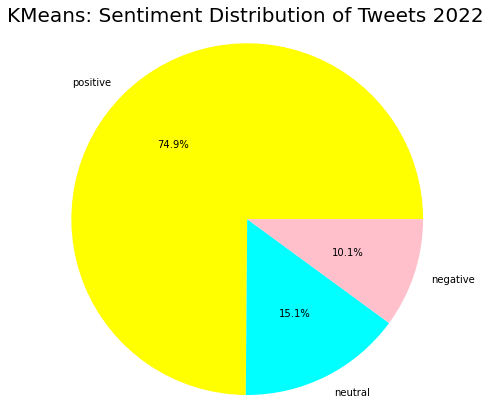

,index,sentiments_val
0,positive,74640
1,neutral,15024
2,negative,10027


In [6]:
data_pie=data2122["sentiments_val"].value_counts().reset_index()
fig = plt.gcf()
fig.set_size_inches(7,7)
colors = ["yellow","cyan","pink"]
plt.pie(data_pie["sentiments_val"],labels=data_pie["index"],radius=2,autopct="%1.1f%%", colors=colors)
plt.axis('equal')
plt.title("KMeans: Sentiment Distribution of Tweets 2022", fontsize=20)
#plt.savefig("images/Sentiment_Distribution.png")
plt.show()
data_pie

#plt.savefig("sent_dist_tweets21.png")

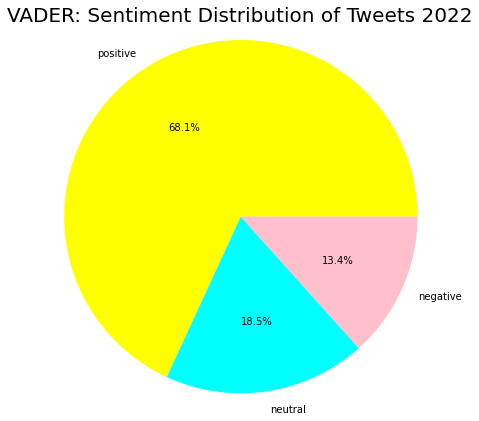

,index,sentiments_val2
0,positive,67909
1,neutral,18471
2,negative,13311


In [7]:
data_pie=data18["sentiments_val2"].value_counts().reset_index()
fig = plt.gcf()
fig.set_size_inches(7,7)
colors = ["yellow","cyan","pink"]
plt.pie(data_pie["sentiments_val2"],labels=data_pie["index"],radius=2,autopct="%1.1f%%", colors=colors)
plt.axis('equal')
plt.title("VADER: Sentiment Distribution of Tweets 2022", fontsize=20)
#plt.savefig("images/Sentiment_Distribution.png")
plt.show()
data_pie

#plt.savefig("sent_vader_tweets21.png")

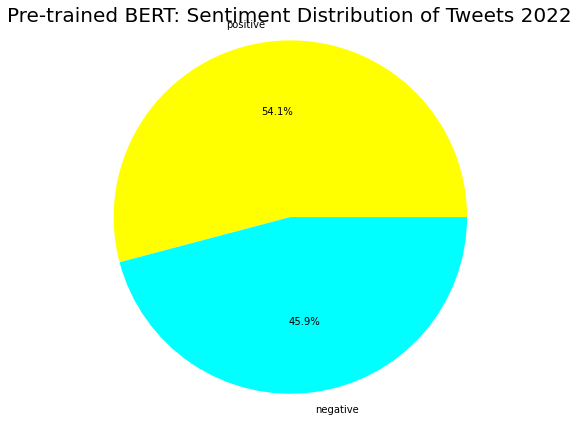

,index,sentiments_val3
0,positive,53948
1,negative,45743


In [8]:
data_pie=data18["sentiments_val3"].value_counts().reset_index()
fig = plt.gcf()
fig.set_size_inches(7,7)
colors = ["yellow","cyan","pink"]
plt.pie(data_pie["sentiments_val3"],labels=data_pie["index"],radius=2,autopct="%1.1f%%", colors=colors)
plt.axis('equal')
plt.title("Pre-trained BERT: Sentiment Distribution of Tweets 2022", fontsize=20)
#plt.savefig("images/Sentiment_Distribution.png")
plt.show()
data_pie

#plt.savefig("sent_bert_tweets21.png")

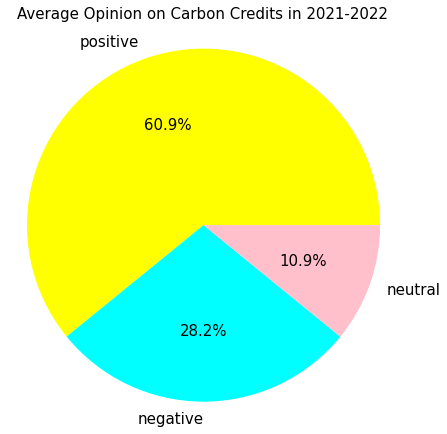

<Figure size 432x288 with 0 Axes>

In [32]:
data_pie=data2122["sent_avg"].value_counts().reset_index()
fig = plt.gcf()
fig.set_size_inches(7,7)
colors = ["yellow","cyan","pink"]
plt.pie(data_pie["sent_avg"],labels=data_pie["index"],radius=2,autopct="%1.1f%%", colors=colors, textprops={'fontsize': 15})
plt.axis('equal')
plt.title("Average Opinion on Carbon Credits in 2021-2022", fontsize=15, pad=15)
#plt.savefig("images/Sentiment_Distribution.png")
plt.show()
data_pie

plt.savefig("avg_tweets2122.png")

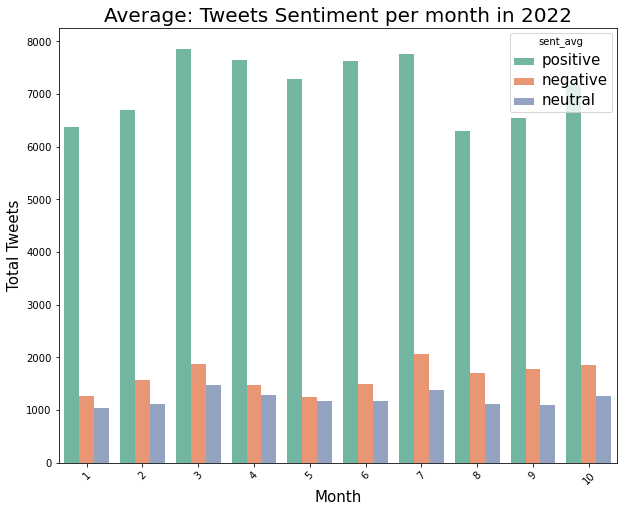

In [30]:
# plotting Tweets Sentiments for each year
plt.subplots(figsize = (10,8))
chart = sns.countplot(x="month",data=data18, palette="Set2",hue="sent_avg");
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.setp(chart.get_legend().get_texts(), fontsize='15') # for legend text
chart.set_xlabel("Month",fontsize=15)
chart.set_ylabel("Total Tweets",fontsize=15)

plt.title("Average: Tweets Sentiment per month in 2022", fontsize=20)
plt.savefig("Tweets_avg22.png")
plt.show();

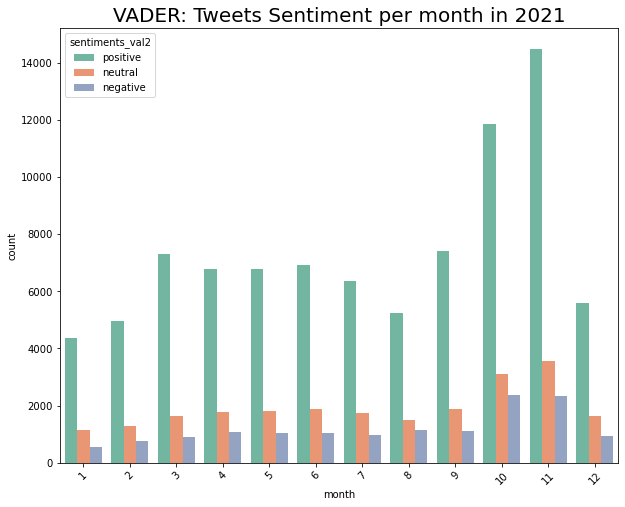

In [58]:
# plotting Tweets Sentiments for each year
plt.subplots(figsize = (10,8))
chart = sns.countplot(x="month",data=data18, palette="Set2",hue="sentiments_val2");
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("VADER: Tweets Sentiment per month in 2021", fontsize=20)
plt.savefig("Tweets_per_year_vader21.png")
plt.show();

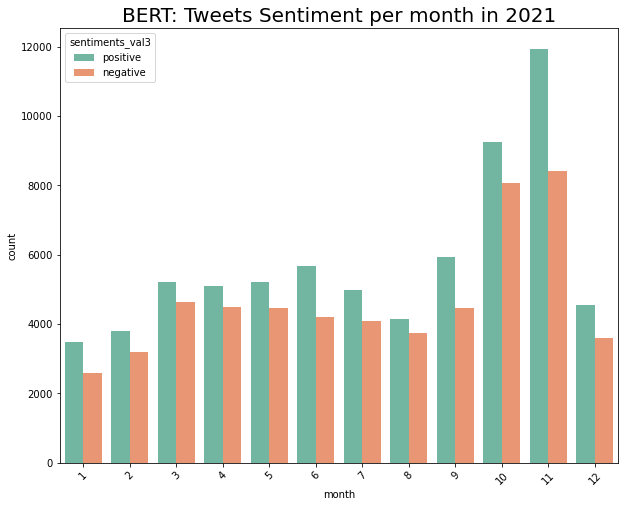

In [59]:
# plotting Tweets Sentiments for each year
plt.subplots(figsize = (10,8))
chart = sns.countplot(x="month",data=data18, palette="Set2",hue="sentiments_val3");
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("BERT: Tweets Sentiment per month in 2021", fontsize=20)
plt.savefig("Tweets_per_yearBERT21.png")
plt.show();

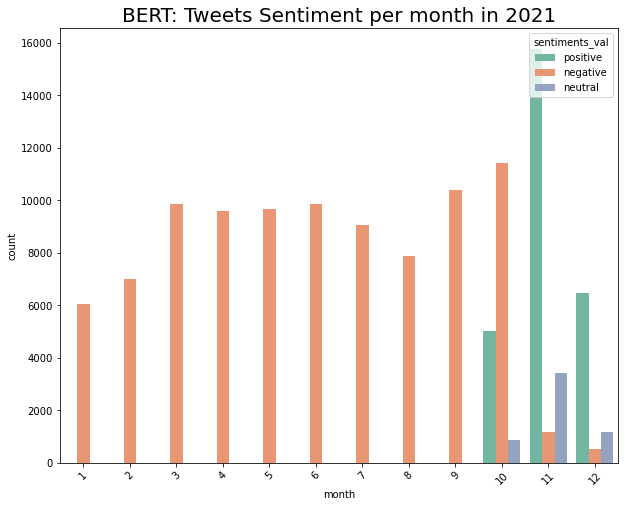

In [60]:
# plotting Tweets Sentiments for each year
plt.subplots(figsize = (10,8))
chart = sns.countplot(x="month",data=data18, palette="Set2",hue="sentiments_val");
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("BERT: Tweets Sentiment per month in 2021", fontsize=20)
plt.savefig("Tweets_per_year21.png")
plt.show();

## Average over all algos

In [62]:
data18.tail()

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,...,TweetC,clean_tweet,cleaned_tweet,date,month,year,sentiments_val,sentiments_val2,sentiments_val3,sent_avg
125221,CryptoRiskGroup,False,2020-11-08 04:33:26+00:00,1205,4952,0,en,2021-01-01 02:55:17+00:00,1,Twitter Web App,...,Guest post: How human activity threatens the #...,"['guest', 'post', 'human', 'activity', 'threat...",guest post human activity threaten carbon rich...,2021-01-01 02:55:17+00:00,1,2021,negative,positive,negative,negative
125222,MissionShunya,False,2019-03-31 02:40:21+00:00,318,215,2,en,2021-01-01 01:18:18+00:00,2,Twitter Web App,...,Happy New Year!\n\nLet's pledge to do our bit ...,"['happy', 'new', 'year', 'let', 'pledge', 'bit...",happy new year let pledge bite transition towa...,2021-01-01 01:18:18+00:00,1,2021,negative,positive,positive,positive
125223,SusHealthcare,False,2011-07-05 09:29:14+00:00,7488,4420,4,en,2021-01-01 01:00:22+00:00,5,Hootsuite Inc.,...,2020 was a year for the books. Amidst the pand...,"['2020', 'year', 'book', 'amidst', 'pandemic',...",2020 year book amidst pandemic saw demand envi...,2021-01-01 01:00:22+00:00,1,2021,negative,positive,negative,negative
125224,LisaKayeCAP,False,2013-08-02 04:16:44+00:00,376,832,1,en,2021-01-01 01:00:03+00:00,1,LinkedIn,...,The race to #NetZero is accelerating. @Ann Met...,"['race', 'accelerate', 'mettler', 'andrillon',...",race accelerate mettler andrillon podcast disc...,2021-01-01 01:00:03+00:00,1,2021,negative,positive,positive,positive
125225,thegalonthego,False,2016-04-12 23:51:26+00:00,398,1346,0,en,2021-01-01 00:32:59+00:00,1,Twitter Web App,...,Excellent reminder\n\n#netzero #emissions,"['excellent', 'reminder']",excellent reminder,2021-01-01 00:32:59+00:00,1,2021,negative,positive,positive,positive


In [63]:
# turn all the sentiments bavk to numbers
def sentimentNum(score):
    if score == 'positive':
        return 1
    elif score == 'negative': 
        return -1
    else:
        return 0

In [64]:
data18['sentiments_val'] =data18['sentiments_val'].apply(lambda x: sentimentNum(x))
data18['sentiments_val2'] =data18['sentiments_val2'].apply(lambda x: sentimentNum(x))
data18['sentiments_val3'] =data18['sentiments_val3'].apply(lambda x: sentimentNum(x))
data18.head(5)

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,...,TweetC,clean_tweet,cleaned_tweet,date,month,year,sentiments_val,sentiments_val2,sentiments_val3,sent_avg
0,UxbEconomist07,False,2016-05-11 22:36:17+00:00,5702,5383,4,en,2021-12-31 22:54:09+00:00,11,Twitter for iPhone,...,I’m so glad that in the meantime US Defence Ch...,"['glad', 'meantime', 'u', 'defence', 'chief', ...",glad meantime u defence chief amp military wor...,2021-12-31 22:54:09+00:00,12,2021,1,1,1,positive
1,CryptoAkasha,False,2017-10-10 23:37:10+00:00,2981,5001,0,en,2021-12-31 22:53:48+00:00,1,Twitter Web App,...,It's time to normalise #NetZero carbon sustain...,"['time', 'normalise', 'carbon', 'sustainable',...",time normalise carbon sustainable travel,2021-12-31 22:53:48+00:00,12,2021,1,0,1,positive
2,AKNdaka,False,2013-07-10 18:19:04+00:00,404,401,0,en,2021-12-31 22:49:18+00:00,1,Twitter for Android,...,Happy new year 2022 to the lovers and defender...,"['happy', 'new', 'year', '2022', 'lover', 'def...",happy new year 2022 lover defender planet let ...,2021-12-31 22:49:18+00:00,12,2021,-1,1,1,positive
3,kevinhagen,False,2009-04-03 16:07:55+00:00,2542,1346,0,en,2021-12-31 22:44:49+00:00,2,Twitter for iPhone,...,#netzero? #ESG goals? Behind the headlines and...,"['goal', 'behind', 'headline', 'news', 'always...",goal behind headline news always story,2021-12-31 22:44:49+00:00,12,2021,1,0,1,positive
4,AmyGarret_GBS,False,2013-05-09 18:22:50+00:00,318,527,1,en,2021-12-31 22:15:10+00:00,1,Seismic LiveSocial,...,How can executives drive industries and organi...,"['executive', 'drive', 'industry', 'organizati...",executive drive industry organization reverse ...,2021-12-31 22:15:10+00:00,12,2021,1,1,-1,positive


In [65]:
def sentimentAvg(val1, val2, val3):
    summ = val1 + val2 + val3
    if summ >= 1:
        return 'positive'
    elif summ < 0: 
        return 'negative'
    else:
        return 'neutral'

In [66]:
data18['sent_avg'] = data18.apply(lambda x: sentimentAvg(val1 = x['sentiments_val'], val2 = x['sentiments_val2'], val3 = x['sentiments_val3']), axis=1)
data18.head(5)

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,...,TweetC,clean_tweet,cleaned_tweet,date,month,year,sentiments_val,sentiments_val2,sentiments_val3,sent_avg
0,UxbEconomist07,False,2016-05-11 22:36:17+00:00,5702,5383,4,en,2021-12-31 22:54:09+00:00,11,Twitter for iPhone,...,I’m so glad that in the meantime US Defence Ch...,"['glad', 'meantime', 'u', 'defence', 'chief', ...",glad meantime u defence chief amp military wor...,2021-12-31 22:54:09+00:00,12,2021,1,1,1,positive
1,CryptoAkasha,False,2017-10-10 23:37:10+00:00,2981,5001,0,en,2021-12-31 22:53:48+00:00,1,Twitter Web App,...,It's time to normalise #NetZero carbon sustain...,"['time', 'normalise', 'carbon', 'sustainable',...",time normalise carbon sustainable travel,2021-12-31 22:53:48+00:00,12,2021,1,0,1,positive
2,AKNdaka,False,2013-07-10 18:19:04+00:00,404,401,0,en,2021-12-31 22:49:18+00:00,1,Twitter for Android,...,Happy new year 2022 to the lovers and defender...,"['happy', 'new', 'year', '2022', 'lover', 'def...",happy new year 2022 lover defender planet let ...,2021-12-31 22:49:18+00:00,12,2021,-1,1,1,positive
3,kevinhagen,False,2009-04-03 16:07:55+00:00,2542,1346,0,en,2021-12-31 22:44:49+00:00,2,Twitter for iPhone,...,#netzero? #ESG goals? Behind the headlines and...,"['goal', 'behind', 'headline', 'news', 'always...",goal behind headline news always story,2021-12-31 22:44:49+00:00,12,2021,1,0,1,positive
4,AmyGarret_GBS,False,2013-05-09 18:22:50+00:00,318,527,1,en,2021-12-31 22:15:10+00:00,1,Seismic LiveSocial,...,How can executives drive industries and organi...,"['executive', 'drive', 'industry', 'organizati...",executive drive industry organization reverse ...,2021-12-31 22:15:10+00:00,12,2021,1,1,-1,positive


In [67]:
data21_withSA = data21_withSA.drop(['sentiment', 'compound'], axis=1)
data21_withSA

NameError: name 'data21_withSA' is not defined

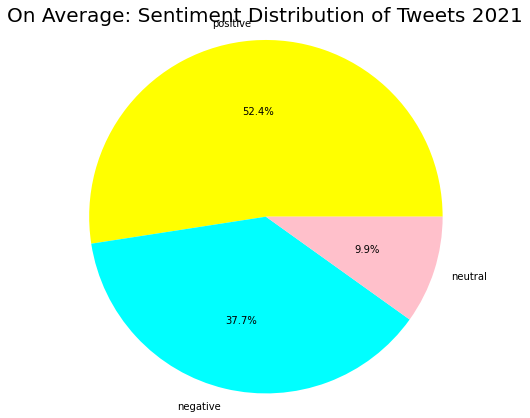

<Figure size 432x288 with 0 Axes>

In [68]:
data_pie=data18["sent_avg"].value_counts().reset_index()
fig = plt.gcf()
fig.set_size_inches(7,7)
colors = ["yellow","cyan","pink"]
plt.pie(data_pie["sent_avg"],labels=data_pie["index"],radius=2,autopct="%1.1f%%", colors=colors)
plt.axis('equal')
plt.title("On Average: Sentiment Distribution of Tweets 2021", fontsize=20)
#plt.savefig("images/Sentiment_Distribution.png")
plt.show()
data_pie

plt.savefig("sent_dist_tweets21avg.png")

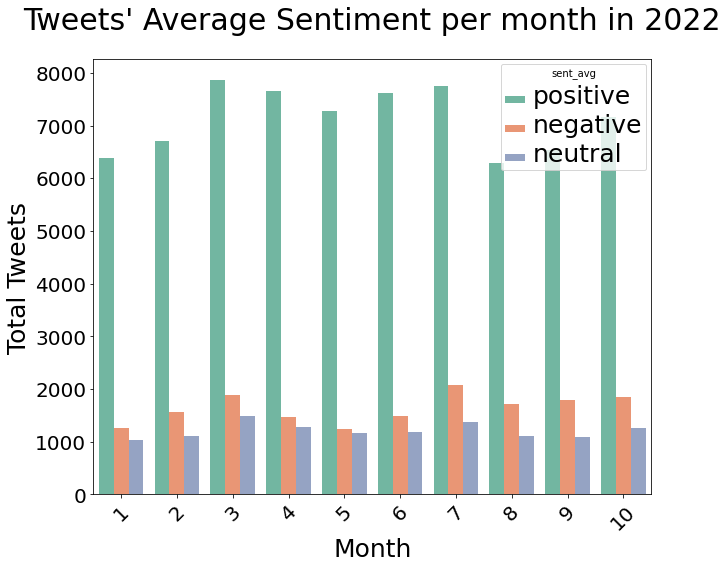

In [43]:
# plotting Tweets Sentiments for each year
plt.subplots(figsize = (10,8))
chart = sns.countplot(x="month",data=data18, palette="Set2",hue="sent_avg");
plt.setp(chart.get_legend().get_texts(), fontsize='25') # for legend text
chart.set_xlabel("Month",fontsize=25)
chart.set_ylabel("Total Tweets",fontsize=25)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, fontsize='15')
chart.tick_params(labelsize=20)

plt.title("Tweets' Average Sentiment per month in 2022", fontsize=30, pad=30)
plt.savefig("Tweets_per_year22avg.png")
plt.show();

In [48]:
data18.to_csv('data22_3algos_avg.csv', index=False)